<a href="https://colab.research.google.com/github/adimis-ai/Computer_Vision_Projects/blob/main/CNN_From_Scratch_for_CIFAR_10_Photo_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras.datasets import cifar10

**Loading the dataset**

In [13]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

**Normalizing the Images**

In [14]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

Randomly Checking a image

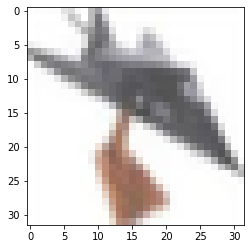

In [16]:
plt.imshow(x_test[215])

**Building a Convolutional Neural Network**

In [17]:
cifar10_model=tf.keras.models.Sequential()

In [18]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

**Compiling the Model**

In [19]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

**Training the Model**

In [20]:
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 193s 123ms/step - loss: 1.4141 - sparse_categorical_accuracy: 0.4881
Epoch 2/15
1563/1563 [==============================] - 191s 122ms/step - loss: 1.0259 - sparse_categorical_accuracy: 0.6340
Epoch 3/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8769 - sparse_categorical_accuracy: 0.6886
Epoch 4/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.7794 - sparse_categorical_accuracy: 0.7264
Epoch 5/15
1563/1563 [==============================] - 187s 120ms/step - loss: 0.7122 - sparse_categorical_accuracy: 0.7479
Epoch 6/15
1563/1563 [==============================] - 187s 120ms/step - loss: 0.6532 - sparse_categorical_accuracy: 0.7683
Epoch 7/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.6098 - sparse_categorical_accuracy: 0.7846
Epoch 8/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.5699 - sparse_categorical_accuracy: 0.7972


**Testing the Model**

In [21]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 30ms/step - loss: 0.7203 - sparse_categorical_accuracy: 0.7722


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7721999883651733
